# Logistic regression
I think it most simple to first demonstrate what type of problem that we are interested in. So here lets compare displacement (disp) for US made and non-US made cars.

Let's first assign mtcars to a new dataframe and then identify the US (1) vs. non_US (0) under the column label "origin."

In [34]:
cars <- mtcars
non_US <- c(1:3, 8:14, 18:21, 26:28, 30:32)
origin <- rep(1, nrow(cars))
origin[non_US] <- 0
cars$origin <- origin
head(cars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,origin
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4,0
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4,0
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1,0
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2,1
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1,1


Now that we have an origin column in our dataframe, let's plot it compared to engine displacement (disp):

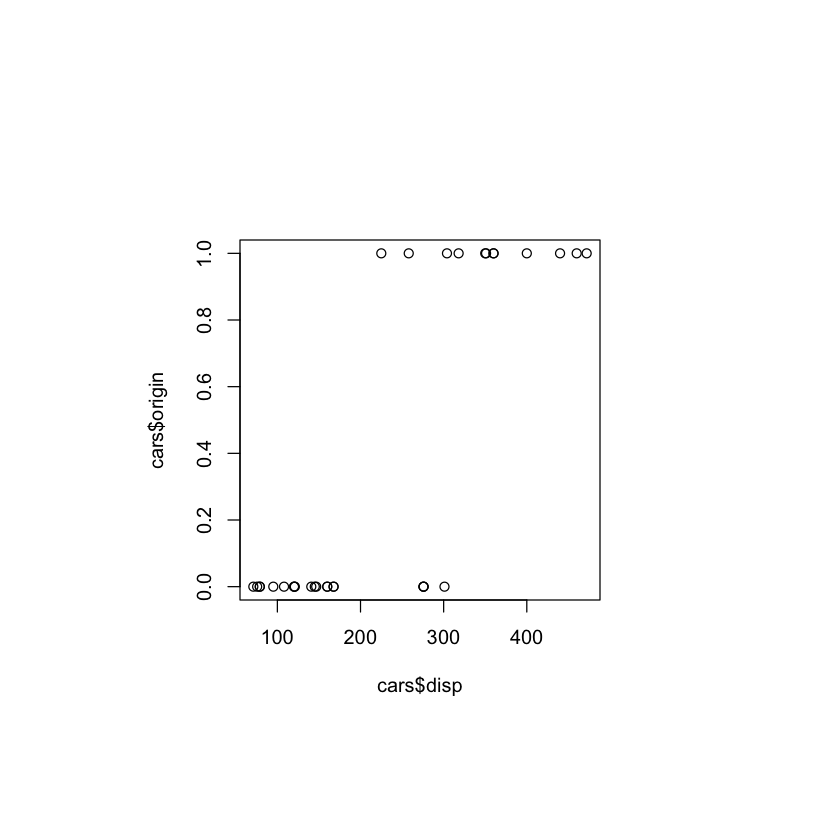

In [35]:
par(pin=c(3,3))
plot(cars$disp, cars$origin)

You can see from the figure that there is an obvious bias to the left for non_US (origin = 0) cars versus US (origin = 1). So clearly, there is a relationship between origin and displacement---US cars have larger engine displacements.

The question that we may then ask is, "Given the engine displacement of a car, is that car likely to be made in the US or not?" Logistic regression is one approach to dealing with this classification problem.


## Definition: Binary logistic regression
For a binary categorical (this would be the dependant variable) versus a continuous (independent) variable we can describe this simple system with the following equations: 
$$\begin{align}
t =& \beta_0 + \beta_1 x \\
Pr(y|x) = p(x) =& \frac{1}{1 + e^{-t}}
\end{align}$$

The function t is called the linear predictor function which includes an intercept and coefficient for the independent variable x. The probability of a positive classification y given x is Pr(y|x). The logit function is the natural logarithm of the odds ratio of the outcome:

$$\begin{align}
logit (p) =& \ln \left(\frac{p(x)}{1-p(x)}\right) = \beta_0 + \beta_1 x 
\end{align}$$

To determine if the value of a given variable should be classified as being of y or not y, the following holds:
$$y =\left\{
                \begin{array}{ll}
                  1 \mbox{    if:    } \beta_0 + \beta_1 x + \epsilon > 0\\
                  0 \mbox{    else:}
                \end{array}
              \right. $$

Unlike linear regression, we cannot fit this equation to our data with a simple least-squares fit. Logistic regression requires the use of a different approach called maximum likelihood estimation (MLE). The computational overhead of finding the best fitting solution means that this approach only became viable with the ubiquity of computers.

Let's plot this function and play with the parameters.


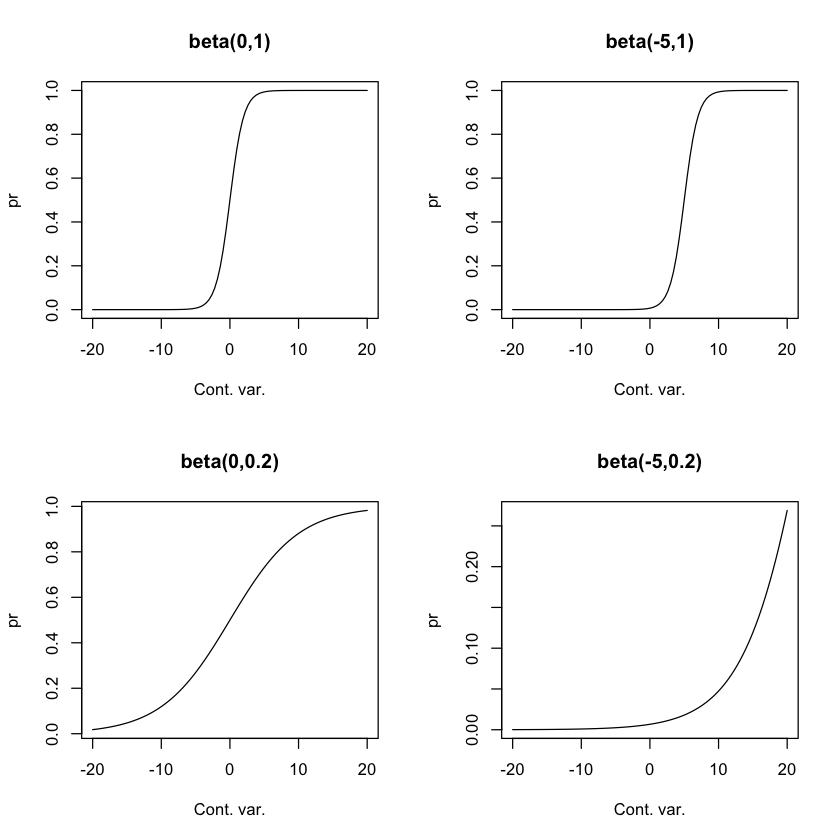

In [36]:
#Definition of the logistic function
x <- seq(-20,20, length=100)
par(mfrow=c(2,2))

beta0 <- 0
beta1 <- 1
pr <- 1/(1+exp(- (beta1*x + beta0) ))
plot(x,pr, xlim=c(-20,20), type="l", xlab='Cont. var.', main='beta(0,1)')

beta0 <- -5
beta1 <- 1
t <- beta0 + beta1*x
pr <- 1/(1+exp(- (t) ))
plot(x,pr, xlim=c(-20,20), type="l", xlab='Cont. var.', main='beta(-5,1)')

beta0 <- 0
beta1 <- 0.2
t <- beta0 + beta1*x
pr <- 1/(1+exp(- (t) ))
plot(x,pr, xlim=c(-20,20), type="l", xlab='Cont. var.', main='beta(0,0.2)')

beta0 <- -5
beta1 <- 0.2
t <- beta0 + beta1*x
pr <- 1/(1+exp(- (t) ))
plot(x,pr, xlim=c(-20,20), type="l", xlab='Cont. var.', main='beta(-5,0.2)')

Note that since the linear predictor function (t) is inside an exponential term, the offset resulting from the \beta_0 term is scaled non-linearly with the other terms.


Going back to our data for car origin versus engine displacement, we can use the general linear model to calculate the \beta parameters:

In [37]:
model <- glm(origin ~ disp, family=binomial(link='logit'), data=cars)
summary(model)


Call:
glm(formula = origin ~ disp, family = binomial(link = "logit"), 
    data = cars)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.51098  -0.19093  -0.07129   0.24559   1.90633  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -8.73478    3.52743  -2.476   0.0133 *
disp         0.03153    0.01234   2.556   0.0106 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 42.340  on 31  degrees of freedom
Residual deviance: 14.342  on 30  degrees of freedom
AIC: 18.342

Number of Fisher Scoring iterations: 7


From the model coefficients, we can plot the probability density function against the real values:

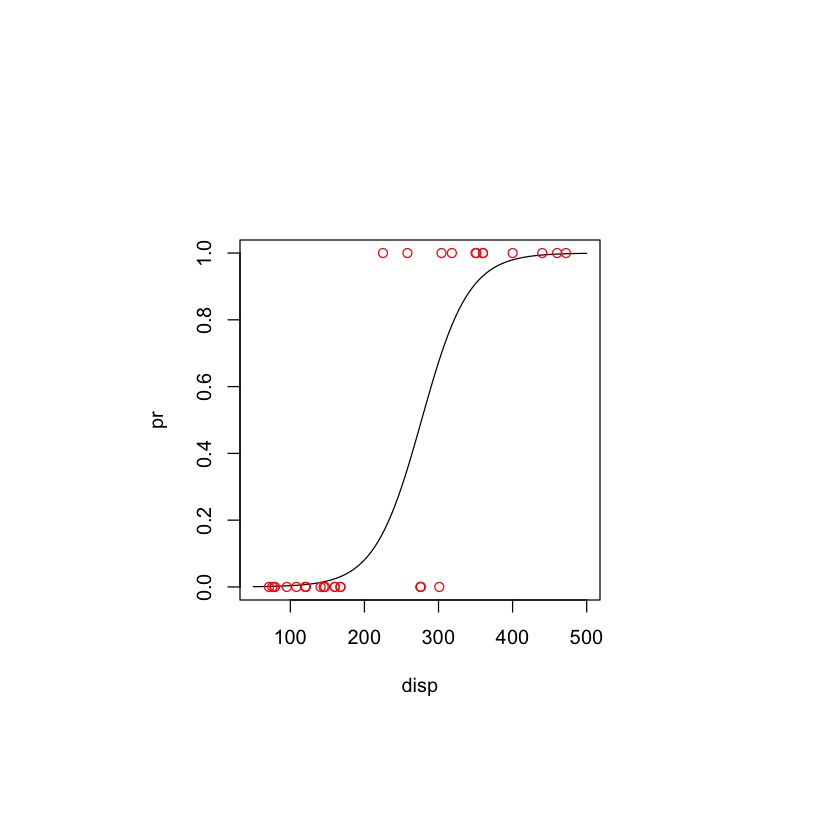

In [38]:
x <- seq(50,500, length=100)
beta0 <- -8.73
beta1 <- 0.0315
t <- beta0 + beta1*x
pr <- 1/(1+exp(- (t) ))
par(pin=c(3,3))
plot(x,pr, type="l", xlab="disp")
points(cars$disp,cars$origin,col="red")

## Odds ratio
In order to interpret the coefficients given by the summary of the general linear model, we need to extract them from the logit equation. Here we get an expression that tells us "for every one unit increase in x, the odds multiply by e^{\beta_1}":

$$\begin{align}
odds =& e^{\beta_1}
\end{align}$$



In [39]:
or = exp(model$coefficient[2]) #We can extract the \beta_1 from the model directly
print(or)

    disp 
1.032036 


We can then interpret this as, "for every increase in engine displacement by 1 cu-in, the likely odds that the car has a US origin increases by 3%."

## Multiple logistic regression
There is no restriction on the number of terms present in the linear predictor function that we used in establishing the model. In the general case we may write the function as:

$$\begin{align}
t =& \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots \\
=& \sum_{i=1}^m \beta_i x_i
\end{align}$$

Note:- It is generally recommended that all predictors used in a model have at least ten corresponding events, although this is a theoretical argument. https://bmcmedresmethodol.biomedcentral.com/articles/10.1186/s12874-016-0267-3


## Classification based on a predictor
The logistic regression model may then be used as a binary classifier for a general set of predictor variables. So given a set of data to "train" on, we can calculate the coefficients and use the predictor function to determine if a case should be classified as yes/no.

We can do this for the existing data by spliting it into a training and query set and calculating the model using only the training set. We can then use the predictor function to decide which way a case from the query set should be classified.

In [40]:
#Take a random sample of the data
set.seed(42) #This fixes the random number generator so that you get the same "random" sample every time
trainingIndex <- sample(1:nrow(cars), 0.8*nrow(cars))
trainingData <- cars[trainingIndex,]
queryData <- cars[-trainingIndex,]
print(queryData)

logmod <- glm(origin ~ disp, family=binomial(link='logit'), data=trainingData) #Create the model
print(logmod) #\beta_0 + \beta_1 x
dispP <- predict(logmod, queryData)
print(dispP)

                mpg cyl  disp  hp drat    wt  qsec vs am gear carb origin
Datsun 710     22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1      0
Valiant        18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1      1
Merc 450SE     16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3      0
Merc 450SL     17.3   8 275.8 180 3.07 3.730 17.60  0  0    3    3      0
Merc 450SLC    15.2   8 275.8 180 3.07 3.780 18.00  0  0    3    3      0
Fiat X1-9      27.3   4  79.0  66 4.08 1.935 18.90  1  1    4    1      0
Ford Pantera L 15.8   8 351.0 264 4.22 3.170 14.50  0  1    5    4      1

Call:  glm(formula = origin ~ disp, family = binomial(link = "logit"), 
    data = trainingData)

Coefficients:
(Intercept)         disp  
  -10.43294      0.03948  

Degrees of Freedom: 24 Total (i.e. Null);  23 Residual
Null Deviance:	    33.65 
Residual Deviance: 5.976 	AIC: 9.976
    Datsun 710        Valiant     Merc 450SE     Merc 450SL    Merc 450SLC 
     -6.169078      -1.549898       0.455695  

From the model of the training data, we can use the \beta coefficients in the linear predictor function (t) to determine whether a classification of US or non-US is more likely. 

Recall that if the t value is greater than zero, then the probability of positive classification is greater than 0.5. Reciprocally, if the t value is less than zero, we can negatively classify the input.

Finally, we can compare the results of origin with predicted origin in a table.

In [41]:
dispP[dispP>0] <- 1
dispP[dispP<0] <- 0

queryData['predicted'] <- dispP
print(queryData)

xtabs( ~ predicted + origin, queryData) #Contingency table or confusion matrix

                mpg cyl  disp  hp drat    wt  qsec vs am gear carb origin
Datsun 710     22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1      0
Valiant        18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1      1
Merc 450SE     16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3      0
Merc 450SL     17.3   8 275.8 180 3.07 3.730 17.60  0  0    3    3      0
Merc 450SLC    15.2   8 275.8 180 3.07 3.780 18.00  0  0    3    3      0
Fiat X1-9      27.3   4  79.0  66 4.08 1.935 18.90  1  1    4    1      0
Ford Pantera L 15.8   8 351.0 264 4.22 3.170 14.50  0  1    5    4      1
               predicted
Datsun 710             0
Valiant                0
Merc 450SE             1
Merc 450SL             1
Merc 450SLC            1
Fiat X1-9              0
Ford Pantera L         1


         origin
predicted 0 1
        0 2 1
        1 3 1

## Contingency tables
We can look at this table in terms of a "contingency table" or in the general classification case "confusion matrix." Here the "truth" of car origin is represented by the columns, where zero is non-US and unity is US. The "predicted" classification is presented by row.

This resembles the false positive (type I) false negative (type II) table for determining the validity of a statistical hypothesis.

For a perfect model the diagonal would constitute the sum of all cases and the off-diagonal would sum to zero. In our case the classifier is fairly poor: Of the two US cars in the sample, one was classified as US (true positive) and one as non-US (false negative). Of the five non-US cars, two were classified as non-US (true negative) and three as US (false positive).

### Precision & recall
Precision is the ratio of true positives to true positives plus true negatives. Recall is the true positives to true positives plus false positives.

$$\begin{align}
P = \frac{tp}{tp + fp} \\
R = \frac{tp}{tp + fn}
\end{align}$$

In the case of predicting origin based on engine displacement alone:

$$\begin{align}
P = \frac{1}{1 + 3}= 1/3 \\
R = \frac{1}{1 + 1} = 1/2
\end{align}$$

### F_1 score
The F_1 score is a measure of a test's accuracy that considers both precision and recall.

$$\begin{align}
F_1 =& 2 \frac{P R}{P+R}
\end{align}$$

Calculated for the prior case:

$$\begin{align}
F_1 =& 2 \frac{1/6}{5/6} \\
=& 1/5
\end{align}$$

## Expanding the model
Let's train a new model that includes the cars weight to determine if our contingency table scores improve.

In [42]:
logmod <- glm(origin ~ disp + wt, family=binomial(link='logit'), data=trainingData) #Create the model
print(logmod) #\beta_0 + \beta_1 x
dispP <- predict(logmod, queryData)
dispP[dispP>0] <- 1
dispP[dispP<0] <- 0

queryData['predicted'] <- dispP
print(queryData)

xtabs( ~ predicted + origin, queryData)


Call:  glm(formula = origin ~ disp + wt, family = binomial(link = "logit"), 
    data = trainingData)

Coefficients:
(Intercept)         disp           wt  
   -3.75075      0.06992     -4.49680  

Degrees of Freedom: 24 Total (i.e. Null);  22 Residual
Null Deviance:	    33.65 
Residual Deviance: 5.259 	AIC: 11.26
                mpg cyl  disp  hp drat    wt  qsec vs am gear carb origin
Datsun 710     22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1      0
Valiant        18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1      1
Merc 450SE     16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3      0
Merc 450SL     17.3   8 275.8 180 3.07 3.730 17.60  0  0    3    3      0
Merc 450SLC    15.2   8 275.8 180 3.07 3.780 18.00  0  0    3    3      0
Fiat X1-9      27.3   4  79.0  66 4.08 1.935 18.90  1  1    4    1      0
Ford Pantera L 15.8   8 351.0 264 4.22 3.170 14.50  0  1    5    4      1
               predicted
Datsun 710             0
Valiant                0
Merc 450SE      

         origin
predicted 0 1
        0 5 1
        1 0 1

From the contingency table, you can see that the inclusion of weight improved the classification accuracy significantly with only one error (the Valiant). The F_1 score is then 1/3.